In [1]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

# Dataset 1: Locations (Points)
locations = gpd.GeoDataFrame({
    'Location_ID': ['Loc_A', 'Loc_B', 'Loc_C'],
    'geometry': [Point(1,1), Point(2,2), Point(3,3)]
})

# Dataset 2: Areas (Polygons)
areas = gpd.GeoDataFrame({
    'Area_ID': ['Area_1', 'Area_2', 'Area_3'],
    'Area_Name': ['Park', 'Community', 'Industrial'],
    'geometry': [
        Polygon([(0,0), (2,0), (2,2), (0,2), (0,0)]),
        Polygon([(1,1), (3,1), (3,3), (1,3), (1,1)]),
        Polygon([(4,4), (5,4), (5,5), (4,5), (4,4)])
    ]
})

# Dataset 3: Pathways (Lines)
pathways = gpd.GeoDataFrame({
    'Pathway_ID': ['Path_1', 'Path_2', 'Path_3'],
    'Pathway_Name': ['Main Street', 'Side Road', 'Service Lane'],
    'geometry': [
        LineString([(0,0), (3,3)]),
        LineString([(2,2), (4,4)]),
        LineString([(5,5), (6,6)])
    ]
})

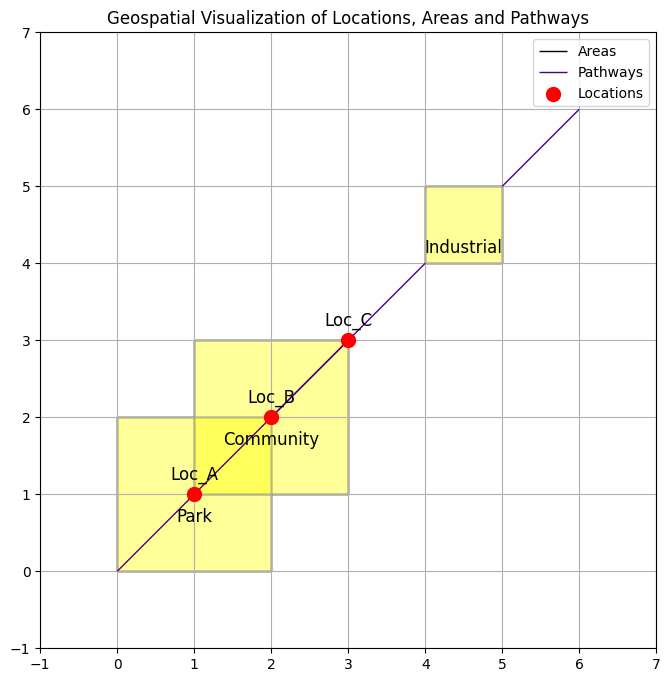

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

# Plot the areas
areas.boundary.plot(ax=ax, color='black', linewidth=1, label='Areas', zorder=1)
areas.plot(ax=ax, alpha=0.4, color='yellow', edgecolor='black')

# Plot the pathways
pathways.plot(ax=ax, color='indigo', linewidth=1, label='Pathways', zorder=2)

# Plot the locations
locations.plot(ax=ax, color='red', marker='o', markersize=100, label='Locations', zorder=3)

# Add labels for areas
for x, y, label in zip(areas.geometry.centroid.x, areas.geometry.centroid.y, areas['Area_Name']):
    ax.text(x, y-0.3, label, fontsize=12, ha='center', va='center', color='black')

# Add labels for locations
for x, y, label in zip(locations.geometry.centroid.x, locations.geometry.centroid.y, locations['Location_ID']):
    ax.text(x, y+0.25, label, fontsize=12, ha='center', va='center', color='black')

ax.set_title('Geospatial Visualization of Locations, Areas and Pathways')
ax.legend()

ax.set_xlim(-1,7)
ax.set_ylim(-1,7)

plt.grid()
plt.show()

# Spatial Relationships

## equals

In [16]:
# Loc_B equals Point(2,2)?
locations.geometry[1].equals(Point(2,2))

True

In [17]:
# Loc_A equals Loc_C?
locations.geometry[0].equals(locations.geometry[2])

False

## contains

In [18]:
# Park contains Loc_A?
areas.geometry[0].contains(locations.geometry[0])

True

In [20]:
# Industrial contains Loc_C?
areas.geometry[2].contains(locations.geometry[2])

False

## crosses

In [21]:
# Main street crosses Community area?
pathways.geometry[0].crosses(areas.geometry[1])

True

In [23]:
# Side Road crosses Industrial area?
pathways.geometry[1].crosses(areas.geometry[2])

False

## disjoint

In [25]:
# Park is disjoint from Industrial Area?
areas.geometry[0].disjoint(areas.geometry[2])

True

In [24]:
# Park is disjoint from Community Area?
areas.geometry[0].disjoint(areas.geometry[1])

False

## intersect

In [26]:
# Community area intersects Main street?
areas.geometry[1].intersects(pathways.geometry[0])

True

In [27]:
# Community area intersects Industrial area?
areas.geometry[1].intersects(areas.geometry[2])

False

## overlaps

In [28]:
# Community area overlaps Park?
areas.geometry[1].overlaps(areas.geometry[0])

True

In [30]:
# Park overlaps Industrial area?
areas.geometry[0].overlaps(areas.geometry[2])

False

## touches

In [34]:
# Park touches Loc_B?
areas.geometry[0].touches(locations.geometry[1])

True

In [35]:
# Industrial Area touches Loc_A?
areas.geometry[2].touches(locations.geometry[0])

False

## within

In [36]:
# Loc_B is within Community Area?
locations.geometry[1].within(areas.geometry[1])

True

In [37]:
# Loc_B is within Park?
locations.geometry[1].within(areas.geometry[0])

False

## covers

In [39]:
# Community Area covers Loc_B
areas.geometry[1].covers(locations.geometry[1])

True

In [42]:
# Park covers Loc_C
areas.geometry[0].covers(locations.geometry[2])

False

In [43]:
# Park covers Point(4,4)
areas.geometry[0].covers(Point(4,4))

False